In [ ]:
# Biblioteca para a modelagem de dados
import pandas as pd
# Biblioteca para recursos matemáticos
import numpy as np
# bibliotecas de plotagem de dados
import seaborn as sns
import matplotlib.pyplot as plt
# Biblioteca/Função para ignorar avisos
from warnings import filterwarnings

In [ ]:
# Plan 1 = Base Dados
# Plan 2 = Novas Entradas
Base_Dados = pd.read_excel('/content/BaseDados_FlorestaDeDecisão.xlsx', 'Plan1')

In [ ]:
# 1 = não usou
# 2 = Serviço
# 3 = Furto

Base_Dados.head()

,Id Cliente,Idade,Preço Seguro,CEP,Serviço
0,1,69,3930,19005,3
1,2,27,3336,19027,1
2,3,49,3936,19001,3
3,4,60,157,19009,1
4,5,51,3998,19050,2


In [ ]:
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Id Cliente    500 non-null    int64
 1   Idade         500 non-null    int64
 2   Preço Seguro  500 non-null    int64
 3   CEP           500 non-null    int64
 4   Serviço       500 non-null    int64
dtypes: int64(5)
memory usage: 19.7 KB


In [ ]:
Base_Dados.describe()

,Id Cliente,Idade,Preço Seguro,CEP,Serviço
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,49.550000,1939.268000,19024.812000,1.904000
std,144.481833,18.167984,1402.289601,15.079105,0.858054
min,1.000000,18.000000,100.000000,19000.000000,1.000000
25%,125.750000,33.750000,612.000000,19011.000000,1.000000
50%,250.500000,51.000000,1667.500000,19025.000000,2.000000
75%,375.250000,65.000000,3329.500000,19038.000000,3.000000
max,500.000000,80.000000,3998.000000,19050.000000,3.000000


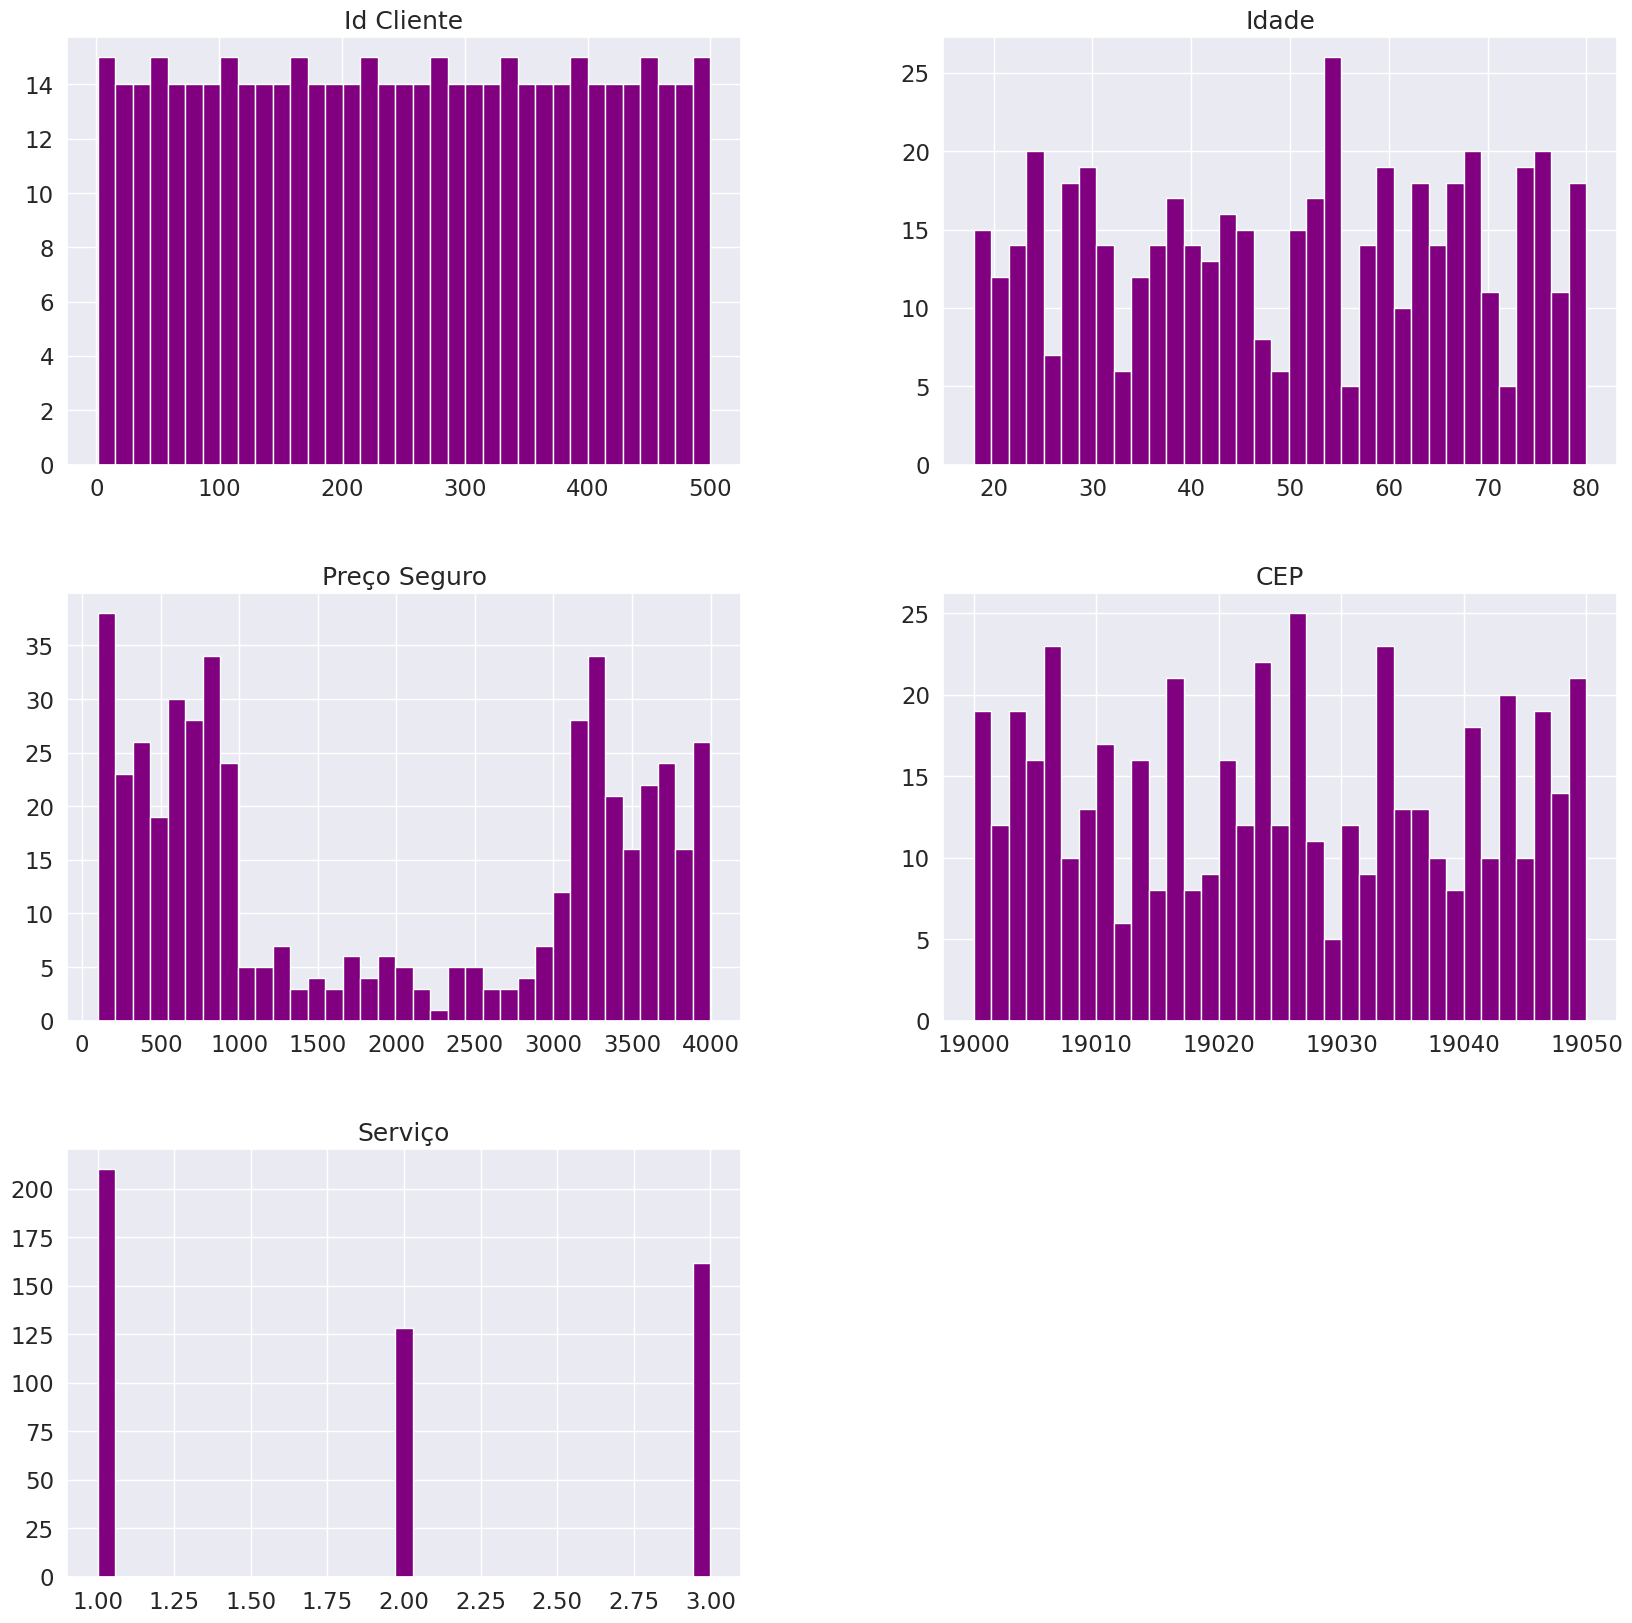

In [ ]:
sns.set( font_scale=1.5, rc={'figure.figsize': (20,20)} )
# Bins = Largura do gráfico
eixo = Base_Dados.hist(bins=35 , color='purple')

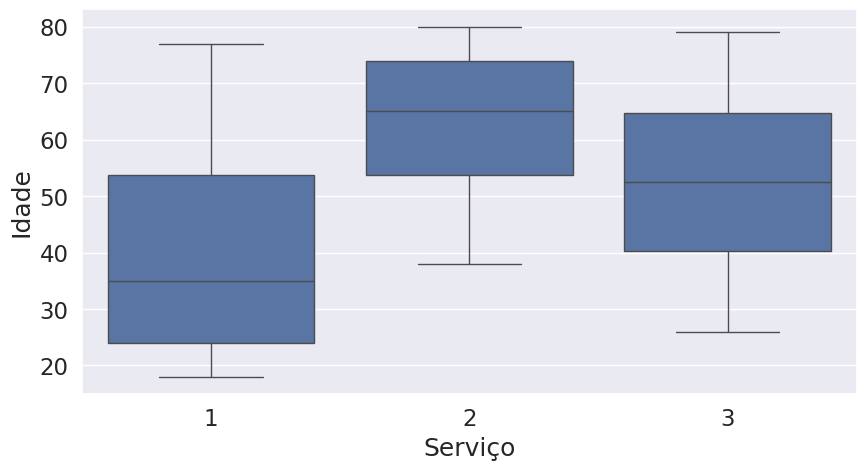

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=Base_Dados, x='Serviço', y='Idade');

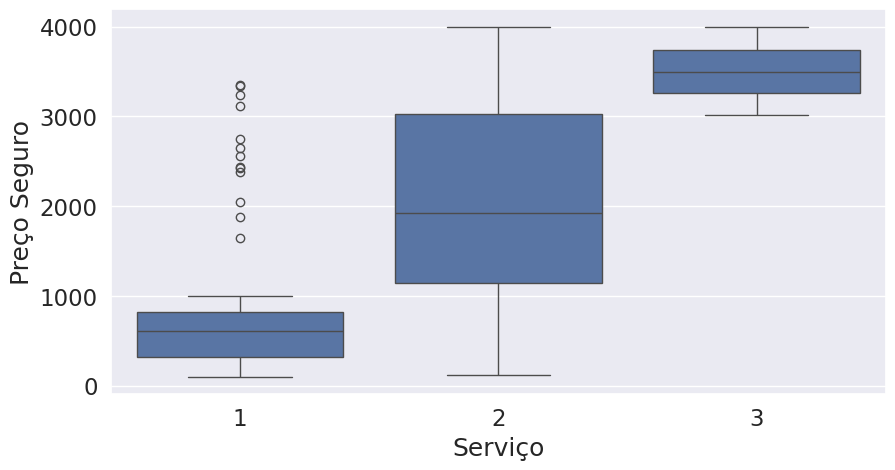

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=Base_Dados, x='Serviço', y='Preço Seguro');

<Axes: xlabel='Serviço', ylabel='CEP'>

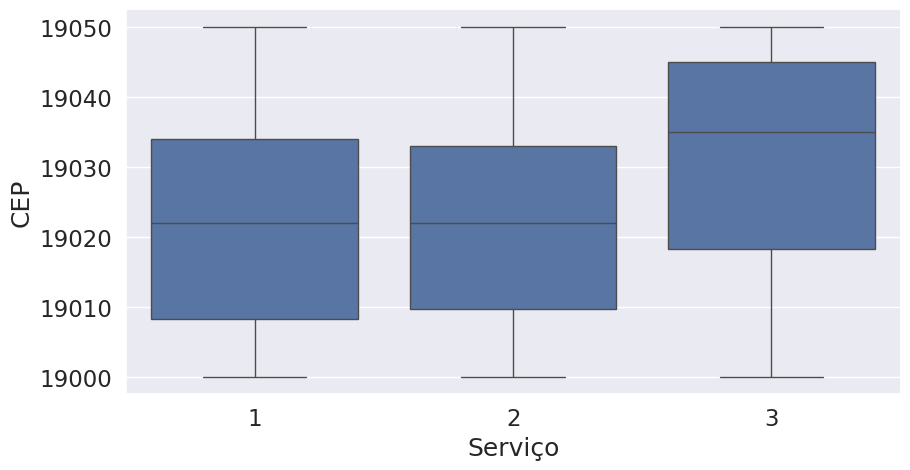

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = Base_Dados, x="Serviço", y='CEP')

In [ ]:
# .values para transformar em um Array
Caracteristicas = Base_Dados.iloc[:,1:4].values
Previsor = Base_Dados.iloc[:,4:5].values

In [ ]:
from sklearn.model_selection import train_test_split

x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(
    Caracteristicas,
    Previsor,
    test_size=0.30,
    random_state=10
)

print(len(Base_Dados)) # Quantia de linha da Base de dados
print(len(x_treinamento)) # Quantia de linhas/dados separados pro treinamento
print(len(x_teste)) # Quantia de linhas/dados separados pro teste

500
350
150


In [ ]:
from sklearn.ensemble import RandomForestClassifier

Algoritmo_floresta_aleatoria = RandomForestClassifier( n_estimators=500) # n_estimators = quantia de árvores de decisões que ele vai testar para ver qual a mais eficaz.
# treinamento da maquina com o .fit()
Algoritmo_floresta_aleatoria.fit(x_treinamento, y_treinamento)

<ipython-input-56-7bf698d63e62>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Algoritmo_floresta_aleatoria.fit(x_treinamento, y_treinamento)


RandomForestClassifier(n_estimators=500)

[[60  3  1]
 [ 6 22  8]
 [ 0  1 49]]


<Axes: >

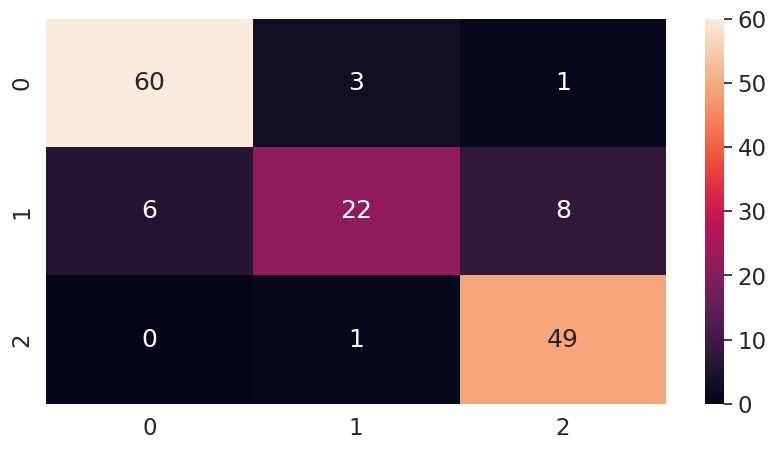

In [ ]:
# COm o modelo ja treinado, utilizei ele para as previsões.
Previsoes = Algoritmo_floresta_aleatoria.predict(x_teste)
#Verificando a matriz de confusão
from sklearn.metrics import confusion_matrix
Matriz_Confusao = confusion_matrix(y_teste, Previsoes)
print(Matriz_Confusao)
# Matriz de confusão em Gráfico
plt.figure(figsize=(10, 5))
sns.heatmap(Matriz_Confusao, annot=True)

In [ ]:
# Porcentagens de precisão
from sklearn.metrics import classification_report

report = classification_report( y_teste, Previsoes)
print( report)

              precision    recall  f1-score   support

           1       0.91      0.94      0.92        64
           2       0.85      0.61      0.71        36
           3       0.84      0.98      0.91        50

    accuracy                           0.87       150
   macro avg       0.87      0.84      0.85       150
weighted avg       0.87      0.87      0.87       150



In [ ]:
Novas_Vendas = pd.read_excel('/content/BaseDados_FlorestaDeDecisão.xlsx', 'Plan2')
Novas_Vendas.head()

,Id Cliente,Idade,Preço Seguro,CEP
0,1001,25,801,19001
1,1002,27,1090,19027
2,1003,45,364,19030
3,1004,30,2428,19014
4,1005,32,891,19020


In [ ]:
Prever = Novas_Vendas.iloc[:, 1:4].values

Novas_Vendas['Previsao do Modelo'] = Algoritmo_floresta_aleatoria.predict(Prever)

In [ ]:
Novas_Vendas['Previsao do Modelo'].value_counts()

1    15
2     5
3     1
Name: Previsao do Modelo, dtype: int64

In [ ]:
Novas_Vendas

,Id Cliente,Idade,Preço Seguro,CEP,Previsao do Modelo
0,1001,25,801,19001,1
1,1002,27,1090,19027,1
2,1003,45,364,19030,1
3,1004,30,2428,19014,1
4,1005,32,891,19020,1
5,1006,36,823,19025,1
6,1007,44,3895,19032,3
7,1008,36,457,19023,1
8,1009,40,427,19008,1
9,1010,40,928,19009,1
